In [56]:
import pandas as pd
from pandas import Series,DataFrame

# The Kaggle Titanic Challenge at the following link:

https://www.kaggle.com/c/titanic-gettingStarted

In [57]:
# Set up the Titanic csv file as a DataFrame
titanic_df = pd.read_csv('train.csv')

In [58]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

In [60]:
def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else:
        return sex
    

# Define a new column called 'person', remember to specify axis=1 for columns and not index
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [61]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [87]:
titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

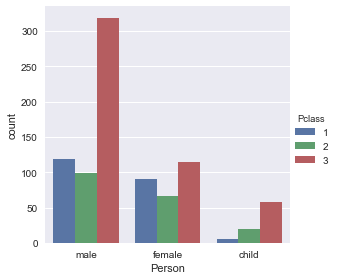

In [64]:
sns.factorplot(x='Person', hue='Pclass', data=titanic_df, kind="count")

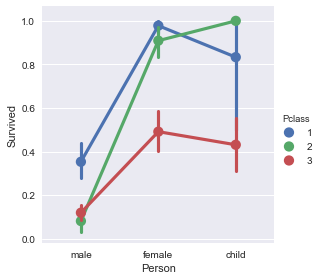

In [66]:
sns.factorplot(x='Person', y='Survived', hue='Pclass', data=titanic_df)

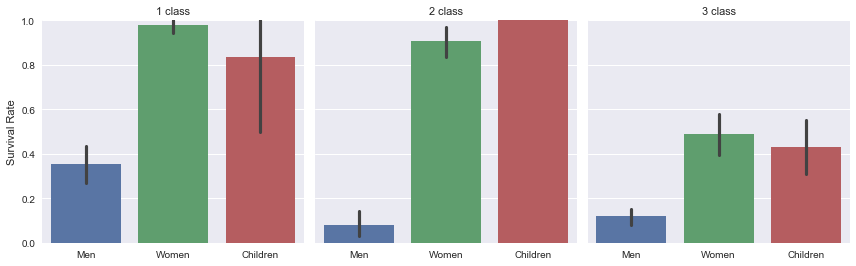

In [104]:
g = sns.factorplot(x='Person', y='Survived', col='Pclass', data=titanic_df, kind='bar')
g.set_axis_labels("", "Survival Rate")
g.set_xticklabels(["Men", "Women", "Children"])
g.set_titles("{col_name} class")
g.set(ylim=(0, 1))

Interesting that the largest group was a male in 3rd class, but they also had the lowest chances to survive. Remember "Women and children first!" policy.

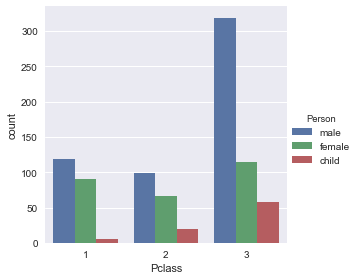

In [68]:
sns.factorplot(x='Pclass', hue='Person', data=titanic_df, kind="count")

Let's create a distribution of ages to get more precise picture of the who passengers were.

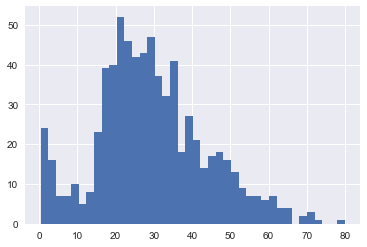

In [85]:
titanic_df['Age'].hist(bins=40)

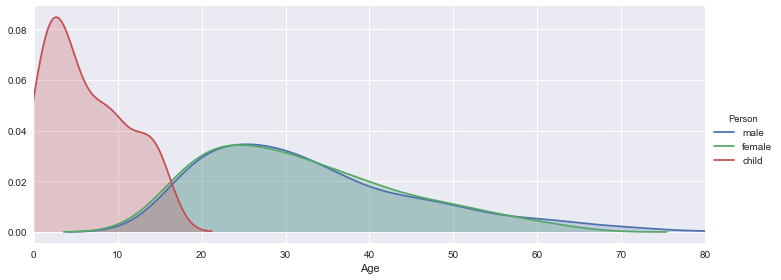

In [124]:
g = sns.FacetGrid(titanic_df, hue ="Person", size=4, aspect=2.5)
g.map(sns.kdeplot,'Age', shade=True)
g.set(xlim=(0,titanic_df["Age"].max()))
g.add_legend()

In [135]:
titanic_df.loc[titanic_df['Cabin'].notnull(),'Deck']=titanic_df.Cabin.str[0]

In [137]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,NaN


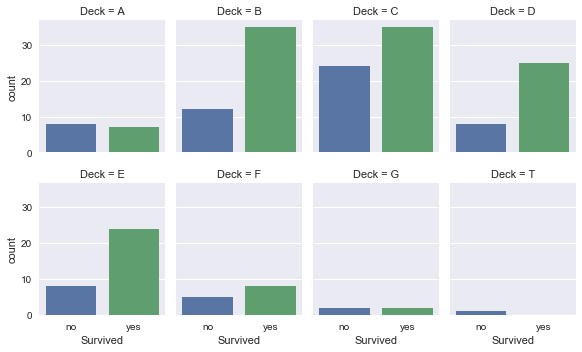

In [147]:
g = sns.factorplot("Survived", col="Deck", col_wrap=4, data=titanic_df[titanic_df['Deck'].notnull()], 
                   kind="count", col_order=['A','B','C','D','E','F','G','T'],
                   size=2.5, aspect=.8)
g.set_xticklabels(["no", "yes"])

# Where did the passengers come from?

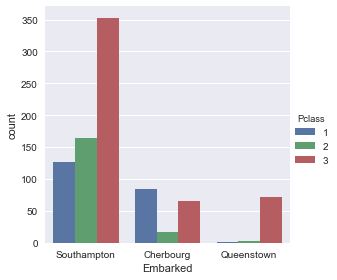

In [156]:
g = sns.factorplot('Embarked',data=titanic_df,hue='Pclass', kind="count")
g.set_xticklabels(["Southampton", "Cherbourg", "Queenstown"])

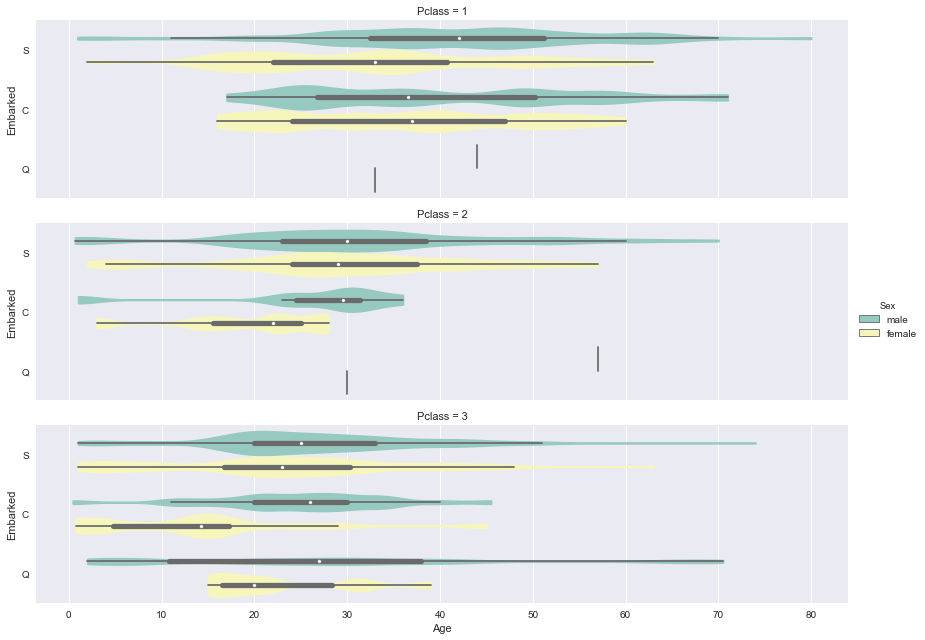

In [167]:
 g = sns.factorplot(x="Age", y="Embarked",
...                    hue="Sex", row="Pclass",
...                    data=titanic_df[titanic_df['Embarked'].notnull()],
...                    orient="h", size=3, aspect=4, palette="Set3",
...                    kind="violin", dodge=True, cut=0, bw=.2)

# Who was alone and who was with family?

In [169]:
titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] ='Alone'
titanic_df.head()


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Deck,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,NaN,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,NaN,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,NaN,Alone


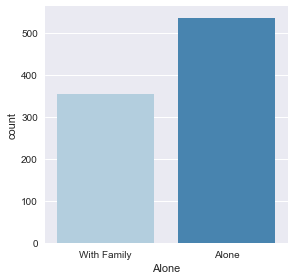

In [170]:
sns.factorplot('Alone',data=titanic_df,palette='Blues', kind="count")